# Qiskit: Basics on Python and Quantum Computing
### Modified By: Razwan Ahmed Tanvir

## Quantum Hello world!

We import the libraries or modules

In [2]:
from qiskit import *

We introduce a line to draw the graphs in the nb

In [3]:
%matplotlib inline

We introduce the next line to know more about the environment.

In [4]:
!pip3 freeze | grep qiskit 

We create the quantum and classical registers

In [8]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

To add the last registers in the circuit

In [9]:
circuit = QuantumCircuit(qr,cr)

We draw the circuit through two ways
1. basic

In [10]:
circuit.draw()

q1_0: 
      
q1_1: 
      
q1_2: 
      
c1: 3/

2. medium

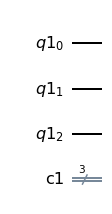

In [11]:
        circuit.draw(output='mpl')

## Example

In [12]:
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'c')
circuit = QuantumCircuit(qr,cr)
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

## Apply a gate in the circuit

We apply the Hadamard gate (H-gate is _superposition_ same probability):
1. circuit.h(qr): for all quantum registers
2. circuit.h(qr[i]): for the i-quantum register.

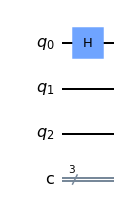

In [13]:
circuit.h(qr[0])
circuit.draw(output='mpl')

## Multiqbit Gates

We add the X-gate (control not or control-X, which is entanglement):
1. circuit.cx[qr[0],qr[1]].

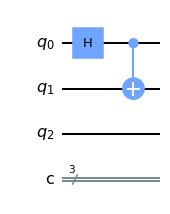

In [14]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

Now, we measure:

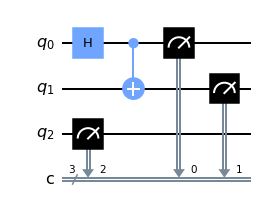

In [15]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

### Concepts

1. Backend is the environment where we can simulate one quantum computer.
2. Pay (time or money) in the tons of works before yours.

## Some quantum computers:
- ibmq_16_melbourne
- ibmq_london
- etc.

We create the _backend_:

In [16]:
bcknd = Aer.get_backend('qasm_simulator')

We execute and get the result:

In [17]:
rslt = execute(circuit, backend=bcknd).result()

And call the modules/libraries to plot the histogram

In [18]:
from qiskit.tools.visualization import plot_histogram

Draw the histogram

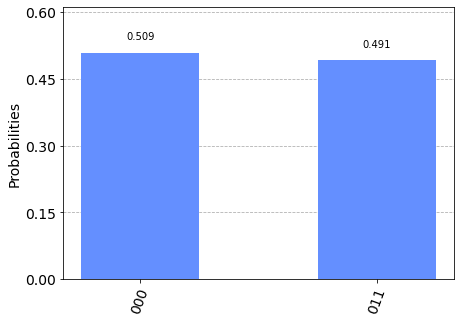

In [19]:
plot_histogram(rslt.get_counts(circuit))

## How to use the Quantum Computer real

We are going to connect with ourself account (I changed my token, you should do same)

## Using my personal token

In [20]:
IBMQ.save_account('776ca3707a60946f7abbc4c0dda2810672d6d22751b98a6d8f5c9750dafcf48f36614d3eff718d4d620193814c82da212b73abb88274ba6ed5ac8b886381a522')

In [21]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

We can see different quantum computers to execute the algorithm/circuit.

In [22]:
prvdr=IBMQ.get_provider(group='open')
prvdr.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

Remember it is important to know the quantum computer arqchitecture.
**Hint:** go to ref. 4 to see the jobs in the computing.

In [23]:
prvdr=IBMQ.get_provider('ibm-q')
qcomp=prvdr.get_backend('ibmq_belem')

Execute the circuit in the quantum computer.

In [24]:
job=execute(circuit, backend=qcomp)

import the tools to show the results

In [25]:
from qiskit.tools.monitor import job_monitor

To know the job status.

In [26]:
job_monitor(job)

Job Status: job has successfully run


Assign the result to new variable.

In [27]:
rslt=job.result()

## Generating the histogram

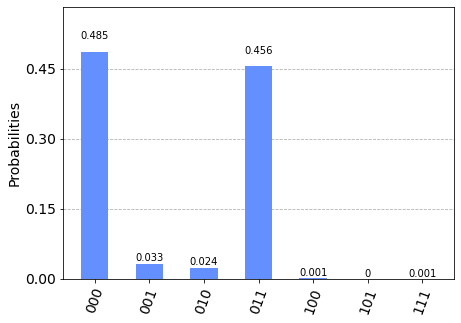

In [28]:
plot_histogram(rslt.get_counts(circuit))

# Exercise

1. Use your account, and your token and re run this NB. 
2. Reproduce this NB with 3 qubits, use the simulator and the quantum computer.
3. Use another provider.
4. Compare and analyze your results. 
5. Write a report. Instructions during the course.

I left some gifs to help with the token and the provider selection.

<img src="../GIF/quantumIBM_token_a.gif" width="350" align="center">

<img src="../GIF/quantumIBM_token_B.gif" width="350" align="center">

In [ ]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

# References


1. Qiskit tutorial: https://qiskit.org/documentation/install.html
2. Github tutorial: https://github.com/Qiskit/qiskit-iqx-tutorials
3. youtube video: https://www.youtube.com/watch?v=L4jYKGrxKRE&feature=youtu.be
4. IBM account: https://quantum-computing.ibm.com/
<!--
https://quantum-computing.ibm.com/
My count with gmail in ciencias.unam
and Github
-->